In [77]:
import cv2
import numpy as np 
from matplotlib import pyplot as plt

### Select And Display 10 Test Images wwith Their GroundTruth

In [78]:
selected = ['007','010', '011','016', '023','029','035','038','042','048' ]
image_arr=[]
gt_arr=[]

for number in selected:
    name = 'dataset/test/SL_'+number+'.jpg'
    gt='dataset/groundtruth/SL_GT_'+number+'.png'
    image = cv2.imread(name,0)
    gt_image= cv2.imread(gt,0)
    image_arr.append(image)
    gt_arr.append(gt_image)
    

In [79]:
def printImageArr(image_arr,x,y,size):
    plt.figure(figsize=(x,y))
    
    for index,image in enumerate(image_arr):
        plt.subplot(1,size,index+1), plt.imshow(image_arr[index],cmap='gray')
        plt.xlabel(str(selected[index])), plt.xticks([]), plt.yticks([])
    plt.show()

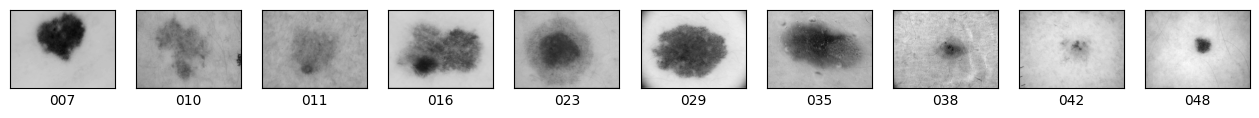

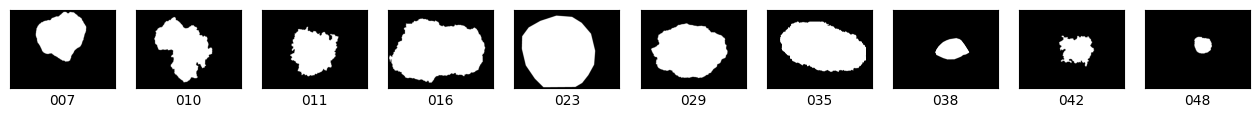

In [67]:
printImageArr(image_arr,16,10,10)
printImageArr(gt_arr,16,10,10)

## Remove the noise using Gaussian Blur

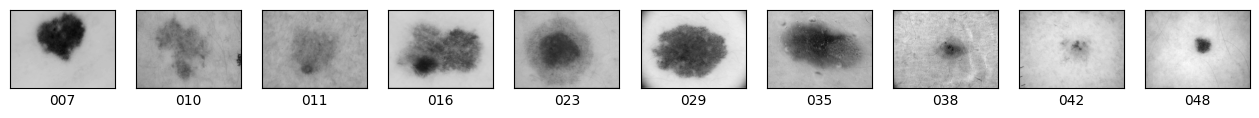

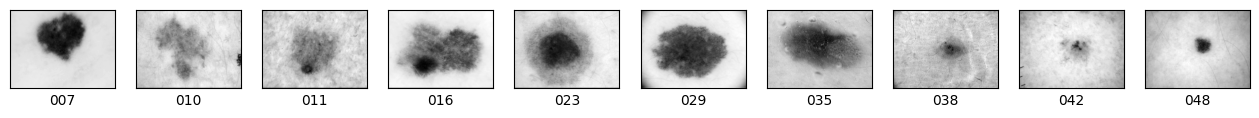

In [69]:
kernelSize=(9,9)
blur_arr=list(map(lambda x:cv2.GaussianBlur(x, kernelSize,0),image_arr))
printImageArr(image_arr,16,10,10)
printImageArr(blur_arr,16,10,10)

### Apply thresholding and invert the colour of the blurred images 

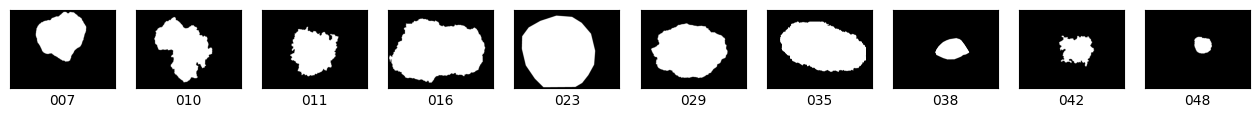

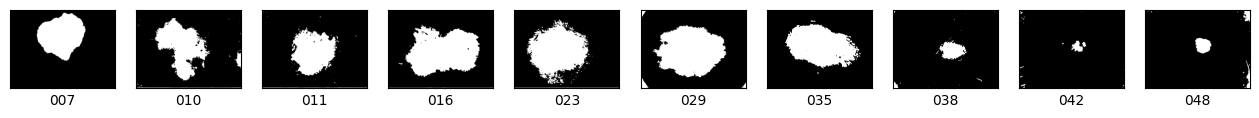

In [72]:
thre_arr = list(map(lambda x: cv2.threshold(x,140,255,cv2.THRESH_BINARY)[1],blur_arr))
thre_arr = list(map(lambda x: cv2.bitwise_not(x),thre_arr))
#kernelSize=(10,10)
#thre_arr = list(map(lambda x:cv2.blur(x, kernelSize),thre_arr))

printImageArr(gt_arr,16,10,10)
printImageArr(thre_arr,16,10,10)

## Apply Morphological Transformation

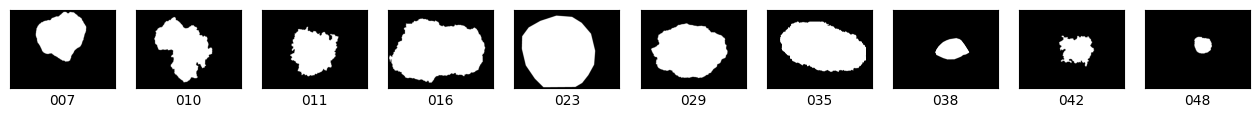

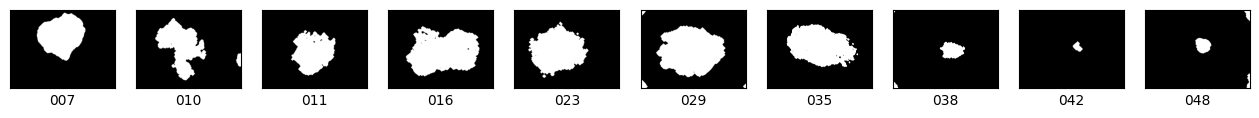

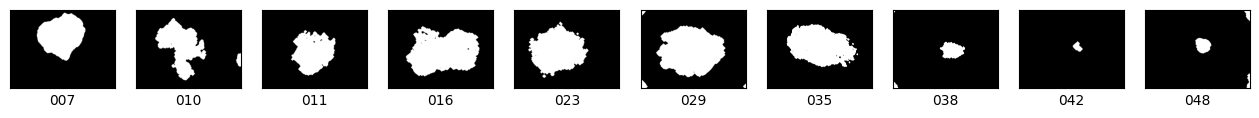

In [76]:
cross_kernel=cv2.getStructuringElement(cv2.MORPH_CROSS,(3, 3))
ellipse_kernel=cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3, 3))


cross_arr= list(map(lambda x: cv2.dilate(x,cross_kernel,iterations = 20),thre_arr))
ellipse_arr= list(map(lambda x: cv2.dilate(x,ellipse_kernel,iterations = 20),thre_arr))
cross_arr= list(map(lambda x: cv2.morphologyEx(x,cv2.MORPH_OPEN,cross_kernel,iterations = 20),thre_arr))
ellipse_arr= list(map(lambda x: cv2.morphologyEx(x,cv2.MORPH_OPEN,ellipse_kernel,iterations = 20),thre_arr))

printImageArr(gt_arr,16,10,10)
printImageArr(cross_arr,16,10,10)
printImageArr(ellipse_arr,16,10,10)